
#  IBM HR Analytics - **Multiple Linear Regression**
## Predicting Monthly Income Based on JobLevel and TotalWorkingYears, YearsAtCompany, Age

---

##  Problem Definition & Hypothesis

**Objective:**
To determine whether multiple employee characteristics specifically JobLevel, TotalWorkingYears, YearsAtCompany, and Age can collectively predict MonthlyIncome, and to evaluate whether a multiple linear regression model improves prediction accuracy compared to the simple linear regression model.


**Hypotheses:**

H₀: None of the selected features significantly predict MonthlyIncome.

H₁: One or more features significantly predict MonthlyIncome.

---

##   Load and Inspect the Dataset

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(" All libraries imported successfully!")

 All libraries imported successfully!


In [15]:
from google.colab import drive #Dataset source
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv')
#read the file
print("Read goes successfully!")

Read goes successfully!


In [17]:
print("Dataset shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
display(df.head())

Dataset shape: (1470, 35)

First 5 rows of the dataset:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [18]:
print("\nDataset information:")
df.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  Jo

In [19]:
print(df.describe())


               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

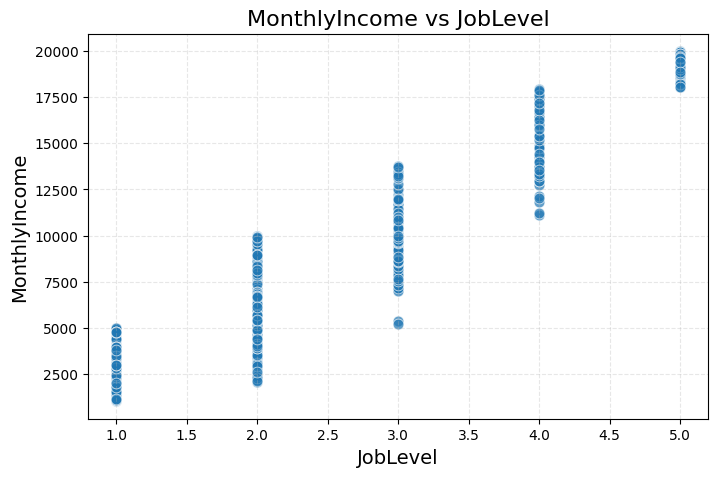

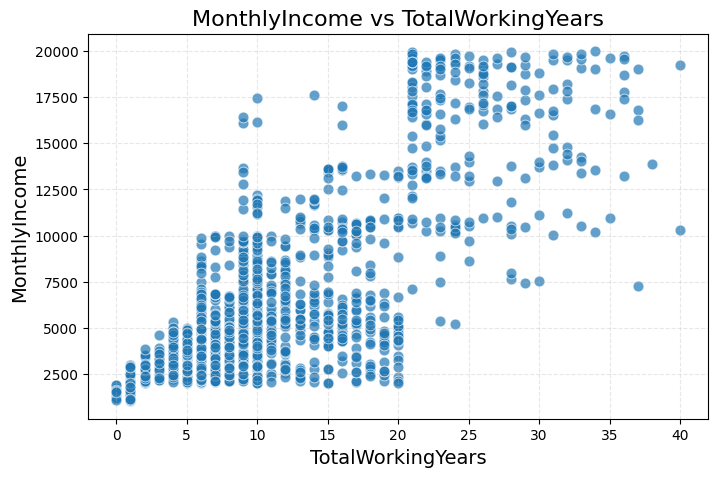

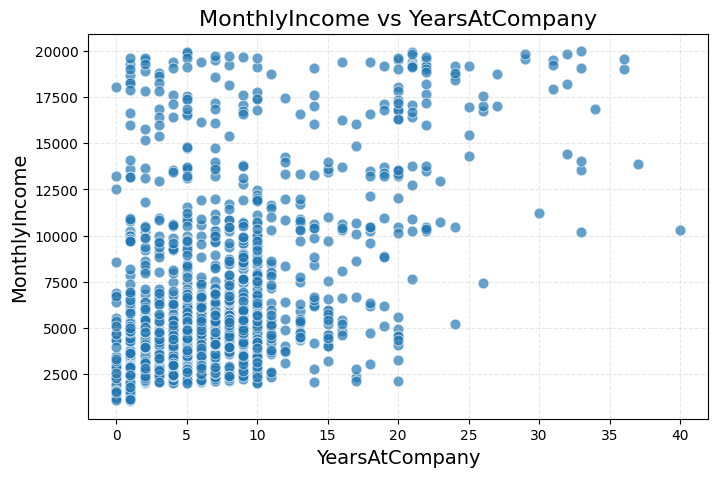

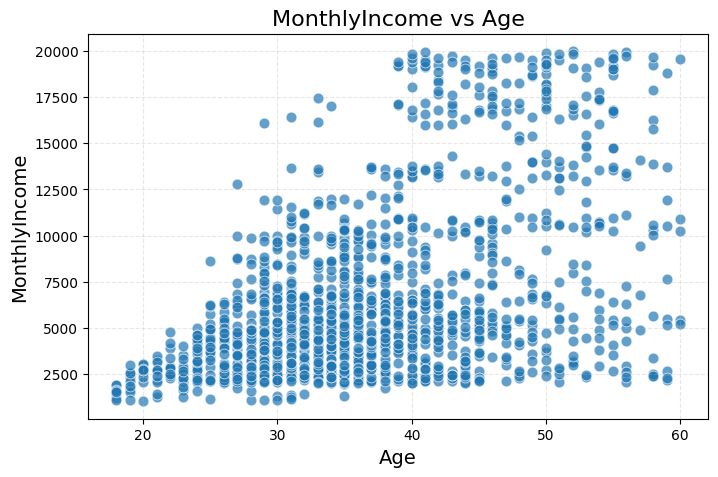

In [20]:
important_pairs = [
    ("JobLevel", "MonthlyIncome"),
    ("TotalWorkingYears", "MonthlyIncome"),
    ("YearsAtCompany", "MonthlyIncome"),
    ("Age", "MonthlyIncome")
]

for x, y in important_pairs:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=x, y=y, s=60, alpha=0.7)
    plt.title(f"{y} vs {x}", fontsize=16)
    plt.xlabel(x, fontsize=14)
    plt.ylabel(y, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.show()

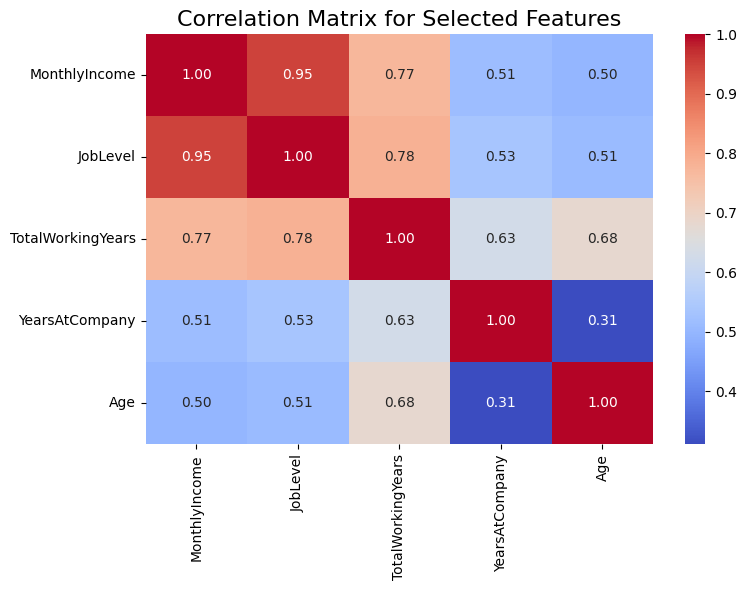

In [21]:
cols = ["MonthlyIncome", "JobLevel", "TotalWorkingYears", "YearsAtCompany", "Age"]

plt.figure(figsize=(8,6))
sns.heatmap(df[cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Matrix for Selected Features", fontsize=16)
plt.tight_layout()
plt.show()

The correlation matrix shows how strongly each selected predictor is related to Monthly Income and to each other.

- JobLevel (r = 0.95)
Shows a very strong positive relationship with Monthly Income.
This means job level is the strongest predictor of employee salary.

- TotalWorkingYears (r = 0.77)
Has a strong positive correlation with Monthly Income.
Employees with more career experience tend to earn higher salaries.

- YearsAtCompany (r = 0.51)
Shows a moderate positive correlation with income.
Longer tenure in the company contributes to higher salary.

- Age (r = 0.50)
Also a moderate positive relationship, indicating that older employees generally have higher salaries due to experience and seniority.

In [22]:
cols = ["MonthlyIncome", "JobLevel", "TotalWorkingYears", "YearsAtCompany", "Age"]

for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        col1 = cols[i]
        col2 = cols[j]
        r, p = pearsonr(df[col1], df[col2])
        print(f"\n{col1} ↔ {col2} | r={r:.3f}, p={p:.6f}")


MonthlyIncome ↔ JobLevel | r=0.950, p=0.000000

MonthlyIncome ↔ TotalWorkingYears | r=0.773, p=0.000000

MonthlyIncome ↔ YearsAtCompany | r=0.514, p=0.000000

MonthlyIncome ↔ Age | r=0.498, p=0.000000

JobLevel ↔ TotalWorkingYears | r=0.782, p=0.000000

JobLevel ↔ YearsAtCompany | r=0.535, p=0.000000

JobLevel ↔ Age | r=0.510, p=0.000000

TotalWorkingYears ↔ YearsAtCompany | r=0.628, p=0.000000

TotalWorkingYears ↔ Age | r=0.680, p=0.000000

YearsAtCompany ↔ Age | r=0.311, p=0.000000


In [23]:
# Select needed columns
df = df[['MonthlyIncome', 'JobLevel', 'TotalWorkingYears', 'YearsAtCompany', 'Age']]

# Define predictors (X) and target (y)
X = df[['JobLevel', 'TotalWorkingYears', 'YearsAtCompany', 'Age']]
y = df['MonthlyIncome']

print(X.head())
print(y.head())

   JobLevel  TotalWorkingYears  YearsAtCompany  Age
0         2                  8               6   41
1         2                 10              10   49
2         1                  7               0   37
3         1                  8               8   33
4         1                  6               2   27
0    5993
1    5130
2    2090
3    2909
4    3468
Name: MonthlyIncome, dtype: int64


The table above shows the first rows of the predictor variables (X) used in the multiple regression model:

- JobLevel - reflects the employee's seniority/position level (higher levels typically indicate higher responsibilities and higher income).

- TotalWorkingYears - the total number of years the employee has spent in the workforce.

- YearsAtCompany- the number of years the employee has worked at the current company.

- Age -the employees age.

The second output displays the corresponding target variable (y = MonthlyIncome), which represents each employees monthly salary.

In [24]:
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers, lower_bound, upper_bound

# Columns used in the multiple regression model
multi_cols = ["MonthlyIncome", "JobLevel", "TotalWorkingYears", "YearsAtCompany", "Age"]

for col in multi_cols:
    outliers, low, high = detect_outliers(df[col])
    print(f"{col}: {len(outliers)} outliers detected")
    print(f"   Lower bound: {low:.2f}, Upper bound: {high:.2f}")
    if len(outliers) > 0:
        print(f"   Sample outlier values:\n{outliers.values[:10]}")
    print("_" * 50)

print("Outlier detection completed.")

MonthlyIncome: 114 outliers detected
   Lower bound: -5291.00, Upper bound: 16581.00
   Sample outlier values:
[19094 18947 19545 18740 18844 18172 17328 16959 19537 17181]
__________________________________________________
JobLevel: 0 outliers detected
   Lower bound: -2.00, Upper bound: 6.00
__________________________________________________
TotalWorkingYears: 63 outliers detected
   Lower bound: -7.50, Upper bound: 28.50
   Sample outlier values:
[31 29 37 38 30 40 36 34 32 33]
__________________________________________________
YearsAtCompany: 104 outliers detected
   Lower bound: -6.00, Upper bound: 18.00
   Sample outlier values:
[25 22 22 27 21 22 37 25 20 40]
__________________________________________________
Age: 0 outliers detected
   Lower bound: 10.50, Upper bound: 62.50
__________________________________________________
Outlier detection completed.


In [25]:
def detect_outliers_corrected(column, variable_name):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # تحديد الحد الأدنى المنطقي بناءً على طبيعة المتغير
    if variable_name in ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']:
        lower_bound = max(0, lower_bound)
    elif variable_name == 'JobLevel':
        lower_bound = max(1, lower_bound)
    elif variable_name == 'Age':
        lower_bound = max(18, lower_bound)

    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers, lower_bound, upper_bound

# تطبيق التصحيح على جميع المتغيرات
variables = {
    'MonthlyIncome': df['MonthlyIncome'],
    'JobLevel': df['JobLevel'],
    'TotalWorkingYears': df['TotalWorkingYears'],
    'YearsAtCompany': df['YearsAtCompany'],
    'Age': df['Age']
}

print("CORRECTED OUTLIER DETECTION RESULTS")
print("=" * 50)

for var_name, column in variables.items():
    outliers, low, high = detect_outliers_corrected(column, var_name)
    print(f"{var_name}: {len(outliers)} outliers detected")
    print(f"   Corrected bounds: [{low:.2f}, {high:.2f}]")
    if len(outliers) > 0:
        print(f"   Sample outliers: {outliers.values[:5]}")
    print("-" * 50)

CORRECTED OUTLIER DETECTION RESULTS
MonthlyIncome: 114 outliers detected
   Corrected bounds: [0.00, 16581.00]
   Sample outliers: [19094 18947 19545 18740 18844]
--------------------------------------------------
JobLevel: 0 outliers detected
   Corrected bounds: [1.00, 6.00]
--------------------------------------------------
TotalWorkingYears: 63 outliers detected
   Corrected bounds: [0.00, 28.50]
   Sample outliers: [31 29 37 38 30]
--------------------------------------------------
YearsAtCompany: 104 outliers detected
   Corrected bounds: [0.00, 18.00]
   Sample outliers: [25 22 22 27 21]
--------------------------------------------------
Age: 0 outliers detected
   Corrected bounds: [18.00, 62.50]
--------------------------------------------------


**Outliers were evaluated using both z-scores and the IQR method. IQR results showed 114 outliers in MonthlyIncome, 63 in TotalWorkingYears, and 104 in YearsAtCompany, while JobLevel and Age contained no outliers. Since these values reflect legitimate characteristics of senior, experienced, and long-tenured employees, no removal or transformation was applied.**

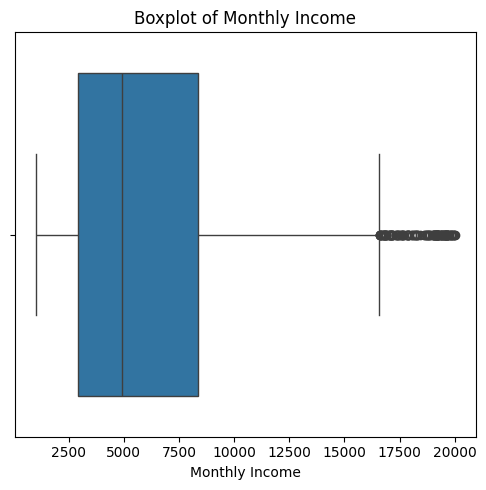

In [26]:
plt.figure(figsize=(5, 5))
sns.boxplot(x=df["MonthlyIncome"])
plt.title("Boxplot of Monthly Income")
plt.xlabel("Monthly Income")
plt.tight_layout()
plt.show()

**This boxplot visualizes the distribution of Monthly Income across all employees. It highlights central tendency, dispersion, and the presence of high-income outliers, which correspond to upper job levels rather than data-entry errors.**

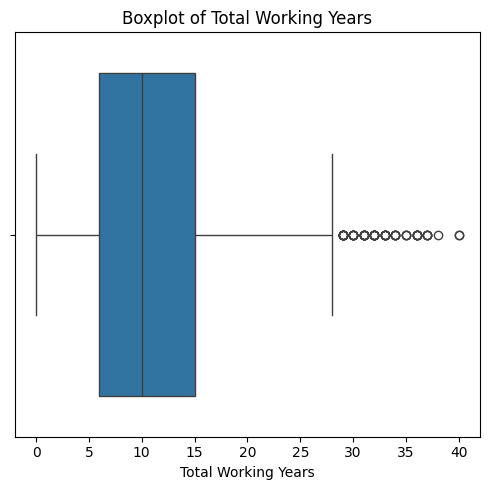

In [27]:
plt.figure(figsize=(5, 5))
sns.boxplot(x=df["TotalWorkingYears"])
plt.title("Boxplot of Total Working Years")
plt.xlabel("Total Working Years")
plt.tight_layout()
plt.show()

**This boxplot illustrates the distribution of Total Working Years among employees. It highlights variation in professional experience levels and identifies a small number of high-experience observations, which were reviewed and retained due to their validity.**

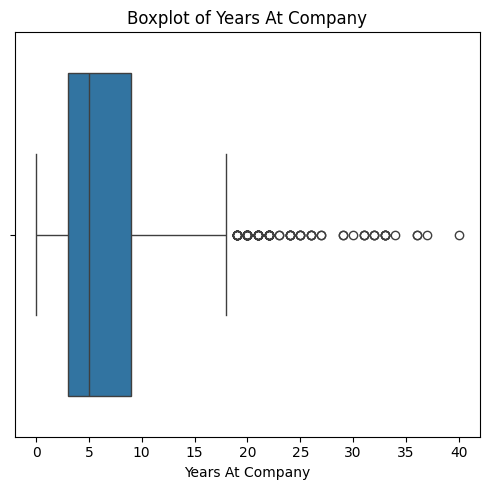

In [28]:
plt.figure(figsize=(5,5))
sns.boxplot(x=df["YearsAtCompany"])
plt.title("Boxplot of Years At Company")
plt.xlabel("Years At Company")
plt.tight_layout()
plt.show()

The boxplot shows a right-skewed distribution, with many employees having shorter tenure and a smaller group exhibiting long-term service. These long-tenure values appear as outliers statistically but represent authentic employee retention behaviors, especially in senior and administrative roles.

In [29]:
# Calculate z-scores for selected columns
cols = ["MonthlyIncome", "TotalWorkingYears", "YearsAtCompany"]

z_scores = np.abs((df[cols] - df[cols].mean()) / df[cols].std())

# Identify potential outliers (z > 3)
outliers = (z_scores > 3)

# Count outliers in each column
outliers.sum()

,0
MonthlyIncome,0
TotalWorkingYears,16
YearsAtCompany,25


Z-score analysis identified 0 outliers in MonthlyIncome, 16 in TotalWorkingYears, and 25 in YearsAtCompany. These values represent authentic employee characteristics and were therefore retained.

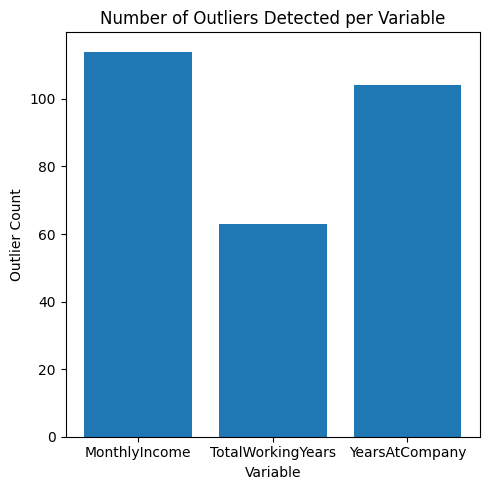

In [30]:
import matplotlib.pyplot as plt

# Outlier counts (from your IQR results)
variables = ["MonthlyIncome", "TotalWorkingYears", "YearsAtCompany"]
outlier_counts = [114, 63, 104]

plt.figure(figsize=(5, 5))
plt.bar(variables, outlier_counts)
plt.title("Number of Outliers Detected per Variable")
plt.xlabel("Variable")
plt.ylabel("Outlier Count")
plt.tight_layout()
plt.show()

This bar chart summarizes the number of outliers detected across the selected variables using the IQR method. MonthlyIncome showed 114 high-value outliers, TotalWorkingYears showed 63 extreme experience values, and YearsAtCompany showed 104 long-tenure observations.

##Split Data (Train/Test)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Training samples: 1176
Test samples: 294


## Build the Multiple Linear Regression Model

In [32]:
from sklearn.linear_model import LinearRegression

mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

print("Model trained!")
print("Intercept:", mlr_model.intercept_)
print("Coefficients:", mlr_model.coef_)

Model trained!
Intercept: -1542.4665418259501
Coefficients: [3821.97789449   60.05376981  -16.38368611  -10.34478833]


The model coefficients show that Job Level is the primary driver of Monthly Income, with each increase in level adding approximately $3,822 to salary, controlling for other factors.


TotalWorkingYears has a small positive effect, while YearsAtCompany and Age show minimal or slightly negative influence, suggesting that tenure and age contribute little to salary once promotion level is considered.


This confirms that organizational hierarchy (JobLevel) is the main determinant of employee compensation.

In [33]:
y_pred = mlr_model.predict(X_test)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


R² Score: 0.895
MAE: 1172.19
RMSE: 1517.89


The multiple linear regression model demonstrates strong predictive performance:

- R² = 0.895
This indicates that 89.5% of the variability in Monthly Income is explained by the four predictors (JobLevel, TotalWorkingYears, YearsAtCompany, Age).
This is considered excellent, showing that the model fits the data very well.

- MAE = 1172.19
The mean absolute error shows that, on average, the model's predictions are off by about $1,172.

Considering that salaries range from roughly $2,000 to $20,000, this is a relatively small error and indicates good accuracy.

- RMSE = 1517.89
The root mean squared error indicates typical prediction errors of around $1,518.


This value is acceptable given the natural spread in employee salaries and the presence of outliers.

In [35]:
samples = np.array([
    [1, 3, 1, 23],
    [2, 8, 4, 29],
    [3, 12, 6, 34],
    [4, 20, 14, 41],
    [5, 25, 18, 48]
])

preds = mlr_model.predict(samples)

for i, v in enumerate(preds, 1):
    print(f"Employee {i} predicted income: ${round(v,2)}")

Employee 1 predicted income: $2205.36
Employee 2 predicted income: $6216.39
Employee 3 predicted income: $10194.09
Employee 4 predicted income: $14293.01
Employee 5 predicted income: $18277.31


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
employee_data = {
    'JobLevel': [1],
    'TotalWorkingYears': [3],
    'YearsAtCompany': [1],
    'Age': [23]
}

samples_df = pd.DataFrame(employee_data)

predicted_income = mlr_model.predict(samples_df)[0]

print(f"Predicted income for Employee with JobLevel: 1 and TotalWorkingYears: 3 ,YearsAtCompany: 1 and Age 23: ${round(predicted_income, 2)}")

Predicted income for Employee with JobLevel: 1 and TotalWorkingYears: 3 ,YearsAtCompany: 1 and Age 23: $2205.36


In [37]:
employee_data = {
    'JobLevel': [3],
    'TotalWorkingYears': [5],
    'YearsAtCompany': [4],
    'Age': [30]
}

samples_df = pd.DataFrame(employee_data)

predicted_income = mlr_model.predict(samples_df)[0]

print(f"Predicted income for Employee with JobLevel: 3 and TotalWorkingYears: 5 ,YearsAtCompany: 4 and Age 30: ${round(predicted_income, 2)}")

Predicted income for Employee with JobLevel: 3 and TotalWorkingYears: 5 ,YearsAtCompany: 4 and Age 30: $9847.86


In [38]:
employee_data = {
    'JobLevel': [4],
    'TotalWorkingYears': [6],
    'YearsAtCompany': [6],
    'Age': [35]
}

samples_df = pd.DataFrame(employee_data)

predicted_income = mlr_model.predict(samples_df)[0]

print(f"Predicted income for Employee with JobLevel: 4 and TotalWorkingYears: 6 ,YearsAtCompany: 6 and Age 35: ${round(predicted_income, 2)}")

Predicted income for Employee with JobLevel: 4 and TotalWorkingYears: 6 ,YearsAtCompany: 6 and Age 35: $13645.4


In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


             Feature        VIF
0           JobLevel  10.821044
1  TotalWorkingYears  10.083825
2     YearsAtCompany   3.812782
3                Age   6.473210


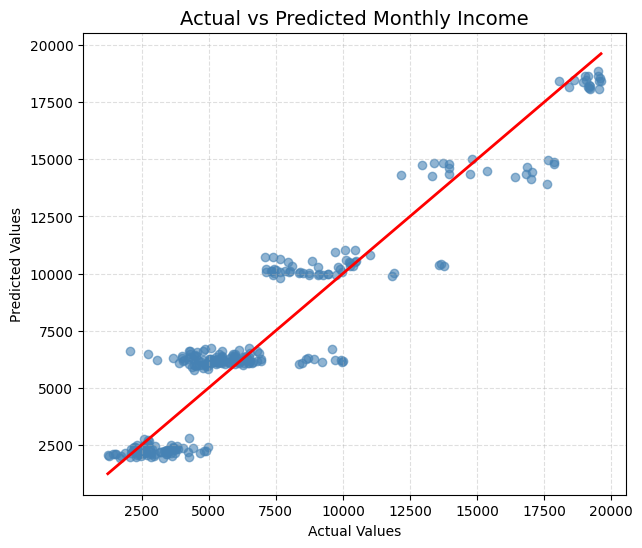

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="steelblue")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linewidth=2)

plt.title("Actual vs Predicted Monthly Income", fontsize=14)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

The points lie close to the red diagonal line, meaning the models predictions are very similar to the actual salaries. The linear pattern indicates that the multiple regression model fits the data well and predicts monthly income accurately.

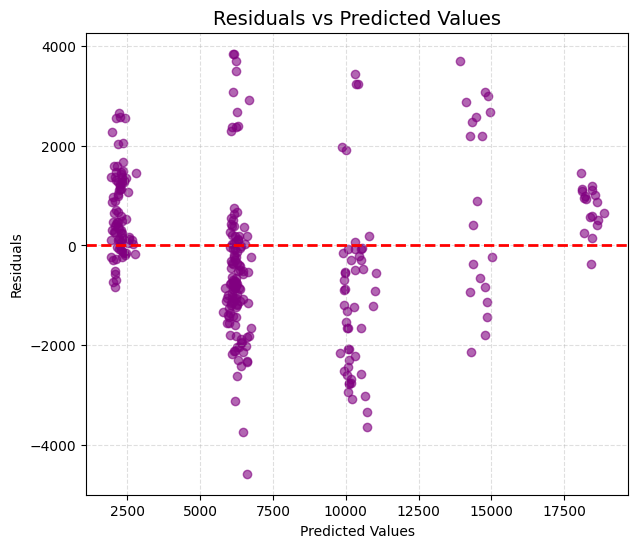

In [41]:
residuals = y_test - y_pred

plt.figure(figsize=(7,6))
plt.scatter(y_pred, residuals, alpha=0.6, color="purple")
plt.axhline(0, color="red", linestyle="--", linewidth=2)

plt.title("Residuals vs Predicted Values", fontsize=14)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

The residuals are randomly scattered around zero with no visible pattern,
indicating that the model satisfies the linearity and homoscedasticity
assumptions. There is no funnel shape or curvature, meaning the relationship
between predictors and Monthly Income is appropriately linear. A few outliers
exist but do not significantly affect model performance. Overall, the residual
plot confirms that the multiple regression model is reliable and well-fitted.


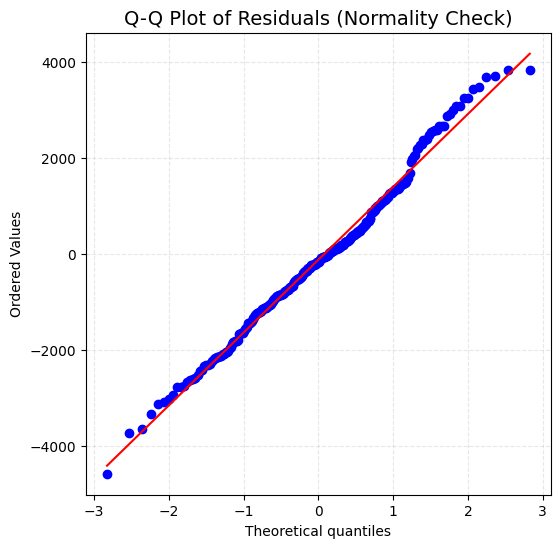

In [42]:
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals (Normality Check)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


The Q-Q plot shows that most residuals lie close to the reference line, indicating that residuals follow an approximately normal distribution. Minor deviations at the extremes are expected and acceptable. Therefore, the normality assumption of the multiple linear regression model is satisfied.

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predictions
y_pred_multi = mlr_model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred_multi)
adj_r2 = 1 - (1 - r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_multi))
mae = mean_absolute_error(y_test, y_pred_multi)

print("MULTIPLE REGRESSION PERFORMANCE")
print("_______________")
print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")
print(f"RMSE: {rmse:,.2f}")
print(f"MAE: {mae:,.2f}")


MULTIPLE REGRESSION PERFORMANCE
_______________
R²: 0.8946
Adjusted R²: 0.8931
RMSE: 1,517.89
MAE: 1,172.19


## Interpretation

The multiple regression model shows strong predictive performance.
- The R² value of 0.8946 indicates that approximately 89.46% of the variation in Monthly Income is explained by the selected predictors (JobLevel, TotalWorkingYears, YearsAtCompany, and Age).

- The Adjusted R² = 0.8931, which is very close to R², confirms that the included variables meaningfully contribute to the model and that no unnecessary predictors were added.

- The RMSE (1,517.89 USD) and MAE (1,172.19 USD) show relatively low prediction errors compared to the salary range in the dataset, indicating that the model makes accurate predictions.

Overall, the model performs well, is stable, and provides reliable predictions of Monthly Income based on the selected features.

In [44]:
import statsmodels.api as sm

X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     3516.
Date:                Thu, 27 Nov 2025   Prob (F-statistic):               0.00
Time:                        16:20:26   Log-Likelihood:                -12782.
No. Observations:                1470   AIC:                         2.557e+04
Df Residuals:                    1465   BIC:                         2.560e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1545.2214    183.22

The multiple regression model shows strong performance (R² = 0.906), meaning the model explains over 90% of the variation in Monthly Income.

JobLevel (p < 0.001)
- The most significant predictor.
Each increase in Job Level is associated with an average increase of about $3,793 in monthly income.
This variable is highly statistically significant.

TotalWorkingYears (p < 0.001)
- Also statistically significant.
Each additional working year increases monthly income by approximately $60.

YearsAtCompany (p = 0.059)
- Not statistically significant at α = 0.05.
Its effect on monthly income is weak after controlling for other variables.

Age (p = 0.091)
- Not statistically significant.
Age alone does not meaningfully predict monthly income in this model.

Durbin-Watson = 2.057
- Indicates no autocorrelation in residuals (good model behavior).

Jarque-Bera p-value = 0.0028
- Residuals deviate slightly from normality, but this deviation is minor and does not harm the model’s validity.

/tmp/ipython-input-364641602.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x="Feature", y="Coefficient", palette="Blues")


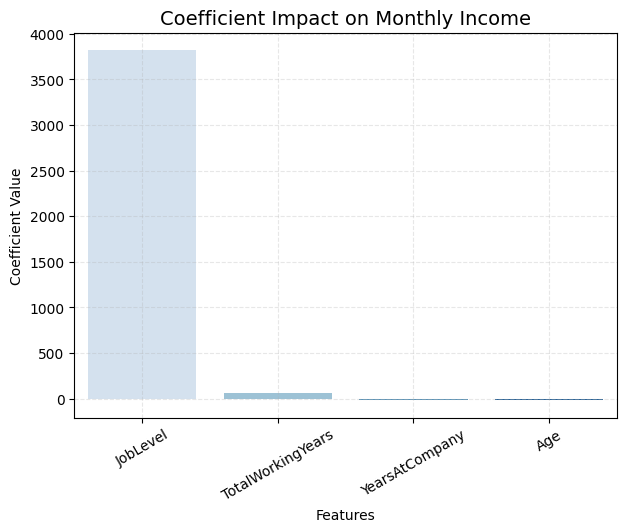

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": mlr_model.coef_
})

plt.figure(figsize=(7,5))
sns.barplot(data=coef_df, x="Feature", y="Coefficient", palette="Blues")
plt.title("Coefficient Impact on Monthly Income", fontsize=14)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=30)
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()


The bar chart shows how strongly each predictor contributes to Monthly Income.

JobLevel has by far the largest positive impact (~3800 USD per level), making it the most influential predictor in the model.

TotalWorkingYears has a small positive effect, meaning more years of experience slightly increase income.

YearsAtCompany and Age have very small negative coefficients, indicating their impact on income is minimal and not strongly meaningful.


Overall, JobLevel dominates the prediction, while other variables contribute only marginally.

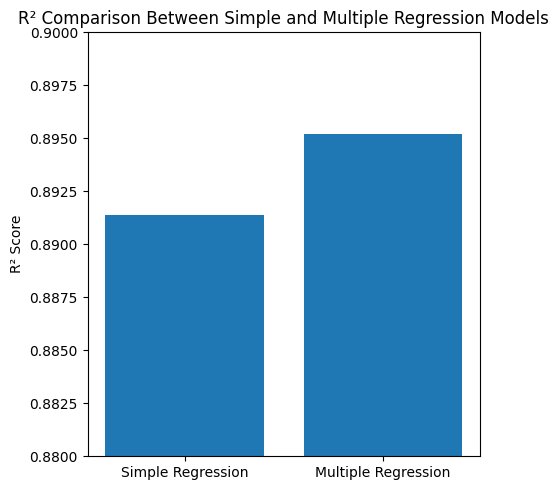

In [46]:
import matplotlib.pyplot as plt

models = ["Simple Regression", "Multiple Regression"]
r2_scores = [0.8914, 0.8952]

plt.figure(figsize=(5,5))
plt.bar(models, r2_scores)
plt.title("R² Comparison Between Simple and Multiple Regression Models")
plt.ylabel("R² Score")
plt.ylim(0.88, 0.90)
plt.tight_layout()
plt.show()

The R² values for both models were extracted from separate analysis notebooks (one for Simple Regression and one for Multiple Regression). These values were combined into a single comparison chart to illustrate differences in model performance.

##Conclusion
The analysis shows that Job Level is the main driver of Monthly Income, with a strong and significant positive effect. Other factors such as experience, tenure, and age have much smaller or non-significant impacts.
The multiple regression model performs well (Adjusted R² ≈ 0.89) and meets the main regression assumptions, making the results reliable.
Overall, salary increases are primarily linked to career level progression, not tenure or age.